Elapsed time: 1525062580.029 sec
Начало
Закончено 1
Закончено 2
Закончено 3
Закончено 4
Чтение закончено
Чтение закончено
Начало построения кластера
Закончена кластеризация
lda.components_.shape: (10, 123364)
Построение вывода 1
Построение вывода 2
Построение вывода 3
topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
фильм         одноклассник  официальн     цен           язык          
год           онлайн        сайт          интернет      сериа         
музык         смотрет       москв         магазин       карт          
мультфильм    игр           авит          инструкц      ру            
март          сер           отзыв         телефон       личн          
город         бесплатн      са            скольк        русск         
кин           песн          работ         сегодн        майл          
сам           сезон         яндекс        ил            детск         
смотрет       сбербан

[ 0.03361308  0.02836734  0.40280793 ...,  0.05        0.13593768
  0.03668738]
Тема 5
[ 389831  946083  942247 ..., 1226691 1010098  117026]
өзге оқыға замандастар өз бастарының пайдасын ған ізде
сойылатын малдард тие жол бойындағ қойылатын талапт
сойылатын малдард тие жол бойындағ қойылатын талапт
реферат на тем правов механизм охра окружа сред
реферат на тем сущност и направлен структурн подход организац
основ законодательств рф «об охран здоров граждан».
кана матч футбол смотрет онлайн прям эфир
par карşıлığı илиşк türkçe алтыазıлı sansürsüz full izl
par карşıлığı илиşк türkçe алтыазıлı sansürsüz full izl
тем войн и революц в роман м. а. шолохов “тих дон
nobod expects dramatic when ira sits down on tuesd
.сıнıф sosya bilgiler çалışм китабı cevaplar
kirkkal arpalik cukuruv cevresind yen yapilasmalar
сıнıф инкıлап tarih çалışм китабı cevaplar
ваш заявк на получен паспорт болельщик прин
. сıнıф ezd ыаыıнларı çалöışм китабı cevaplar
6ç сıнıф türkçe çалışм китабı cevaplar
тамыр соғуының

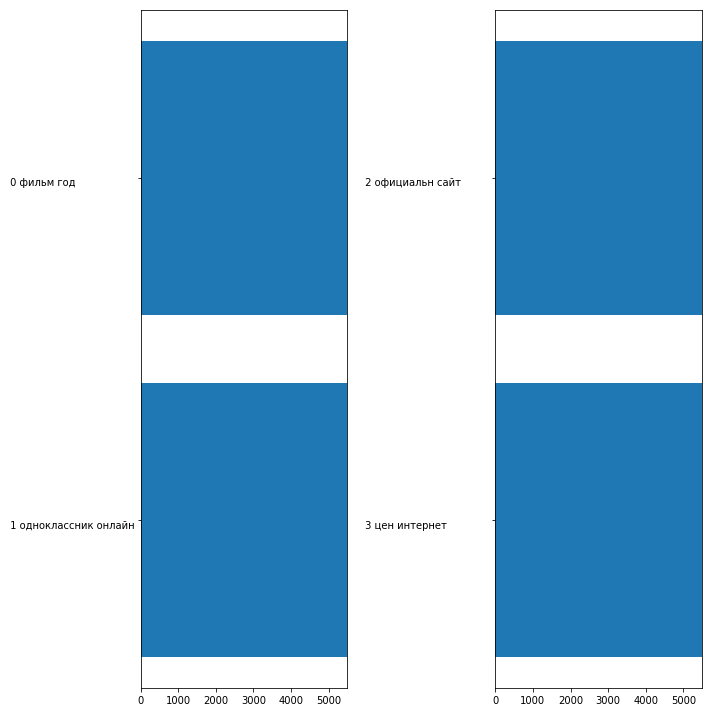

In [15]:
import pandas as pd
import re
import spacy
import nltk
import pymorphy2
import csv
from pandas import read_csv
import numpy as np
import mglearn
import matplotlib.pyplot as plt
import time

print ("Elapsed time: {:.3f} sec".format(time.time()))
print ("Начало")
#pt='/Users/Daniel/Downloads/Log.txt'
#читаем файл
#data_log = pd.read_csv(pt, sep='\t', encoding='utf8', parse_dates=['datetime'], dayfirst=True)
# выводим содержимое для предварительной визуальной оценки
#data_pandas = pd.DataFrame(data_log)
#pd.options.display.max_rows = 100
#pd.options.display.max_colwidth=10000
#display(data_pandas)
#видим, что у нас всего 1333503 строк с ззапросами
#выбираем столбец, с которым будем работать
#data_request = data_log['request'][:2500]
#print (len(data_request))


#data_request = [doc.replace("https://yandex.ru/search/?text=", "") for doc in data_request]
print ("Закончено 1")
#data_request = [doc.lower() for doc in data_request]
print ("Закончено 2")
#data_request = [doc[:doc.find('&')] for doc in data_request]
print ("Закончено 3")
#data_request = [re.sub( r'\b\d+\b', '', doc ) for doc in data_request] #  удаляем  числительные
print ("Закончено 4")
#data_request = [x for x in data_request if x != ''] #  удаляем  пустые запросы


#m = pymorphy2.MorphAnalyzer()
#data_normal = [' '.join ([m.parse (word)[0].normal_form for word in txt.split()]) for txt in data_request]
#data_normal = []
f = open('/Users/Daniel/Downloads/steem_data.txt', "r+")
s = f.read().split('\t')
data_normal=s
f.close()
print ("Чтение закончено")
data_normal_s = (data_normal [:25000])

f = open('/Users/Daniel/Downloads/steem_data.txt', "r+")
s = f.read().split('\t')
data_request=s
f.close()
print ("Чтение закончено")
data_request_s = (data_request [:25000])



#from nltk.stem import  SnowballStemmer
#stemmer = SnowballStemmer('russian')
#stem=[' '.join ([stemmer.stem(w) for w in txt.split()]) for txt in (data_request[:3500])]
#data_normal_s = (stem)


#data_request_s = data_request[:1500]

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text
from sklearn.pipeline import make_pipeline

ru_stop_words = set (['и', 'в', 'не', 'что', 'он', 'на', 'я', 'где' 'с', 'со', 'как', 'а',
                      'то', 'все', 'она', 'так', 'его', 'но', 'да','ты', 'к', 'у', 'же',
                      'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от',
                      'меня','еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'нру',
                      'вдруг', 'ли', 'если', 'уже','для', 'про', 'где', 'эт', 'как', 'почему', 
                      'где', 'сколько','а', 'б', 'в', 'г', 'д','е', 'ё', 'ж', 'з', 'и', 'к', 
                      'л', 'м','н', 'о', 'п', 'р', 'с','т', 'у', 'ф', 'х', 'ц', 'ч', 'ш',
                      'щ', 'э','ю', 'я', 'q', 'w', 'e','r', 't', 'y', 'u', 'i', 'o', 'p',
                      'a', 's','d', 'f', 'g', 'h', 'j','k', 'l', 'z', 'x', 'c', 'v', 'b',
                      'n', 'm','0', '1', '2', '3','4', '5', '6', '7', '8', '9'])
my_stop_words = text.ENGLISH_STOP_WORDS.union (ru_stop_words)

from sklearn.feature_extraction.text import CountVectorizer
#vect = CountVectorizer(min_df=2,stop_words = my_stop_words).fit(data_normal_s)
#X_train= vect.fit_transform (data_normal_s)

tfidf_v = TfidfVectorizer(min_df=2, max_df=0.95, stop_words = my_stop_words)
X = tfidf_v.fit_transform (data_normal)


#idx = np.ravel(X.sum(axis=0).argsort(axis=1))[::-1][:1000]
#top_10_words = np.array(tfidf_v.get_feature_names())[idx].tolist()

#print("10 самых часто встречаемых:\n{}".format(top_10_words))

 
from sklearn.decomposition import LatentDirichletAllocation
print ("Начало построения кластера")
topics = 10
lda = LatentDirichletAllocation(n_components = topics, learning_method="online",
                                max_iter=30, random_state=100, n_jobs=1, total_samples=2000000.0)
document_topics = lda.fit_transform(X)



print ("Закончена кластеризация")

print("lda.components_.shape: {}".format(lda.components_.shape))
print ("Построение вывода 1")

topics = np.array (range(topics))

sorting = np.argsort(lda.components_, axis=1)[:, ::-1]

print ("Построение вывода 2")
feature_names = np.array(tfidf_v.get_feature_names())

print ("Построение вывода 3")
mglearn.tools.print_topics(topics=topics, feature_names=feature_names, 
                           sorting=sorting, topics_per_chunk=5, n_words=15)
print (document_topics)


for j in topics:
    music = np.argsort(document_topics[:,j])[::-1]
    print (document_topics[:,j])
    print ("Тема {}".format(topics[j]))
    print ((music))
    for i in music[:20]:
        print(data_request[i])
        
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
topic_names = ["{:>2} ".format(i) + " ".join(words)
               for i, words in enumerate(feature_names[sorting[:, :2]])]
# two column bar chart:
for col in [0, 1]:
    start = col * 2
    end = (col + 1) * 2
    ax[col].barh(np.arange(2), np.sum(document_topics, axis=0)[start:end])
    ax[col].set_yticks(np.arange(2))
    ax[col].set_yticklabels(topic_names[start:end], ha="left", va="top")
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, 155000)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)
plt.tight_layout()
print ("Elapsed time: {:.3f} sec".format(time.time()))

#stories_sf = gl.load_sframe("hn_processed.sframe")
#bows = stories_sf['bow']
#topic_model = gl.topic_model.create(bows, num_topics=100, num_iterations=200)



In [29]:
#Видим, что 5 тема связана с просмотром телевидения выведем результаты
music = np.argsort(document_topics[:,5])[::-1]
print ("Тема {}".format(topics[5]))
for i in music[15690:16030]:
    print(data_request[i])
#Опытным пуетм выясняем, что после 16000 запросов появляется мусор, отбираем все до него 
#!!! Ответ 16000/1333503=1,1 %
#Доля поисковых запросов для темы "просмотр телевидения" методом машинного обучения составляет 
for i in music[:16000]:
    data_tv = (data_request[i])

data_tv = [doc.replace("https://yandex.ru/search/?text=", "") for doc in data_request]
print ("Закончено 1")
data_tv = [doc.lower() for doc in data_request]
print ("Закончено 2")
data_tv = [doc[:doc.find('&')] for doc in data_request]
print ("Закончено 3")
data_tv = [re.sub( r'\b\d+\b', '', doc ) for doc in data_request] #  удаляем  числительные
print ("Закончено 4")
data_tv = [x for x in data_request if x != ''] #  удаляем  пустые запросы



from nltk.stem import  SnowballStemmer
stemmer = SnowballStemmer('russian')
stem=[' '.join ([stemmer.stem(w) for w in txt.split()]) for txt in (data_request[:3500])]
data_normal_2 = (stem)


#data_request_s = data_request[:1500]

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text
from sklearn.pipeline import make_pipeline

ru_stop_words = set (['и', 'в', 'не', 'что', 'он', 'на', 'я', 'где' 'с', 'со', 'как', 'а',
                      'то', 'все', 'она', 'так', 'его', 'но', 'да','ты', 'к', 'у', 'же',
                      'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от',
                      'меня','еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'нру',
                      'вдруг', 'ли', 'если', 'уже','для', 'про', 'где', 'эт', 'как', 'почему', 
                      'где', 'сколько','а', 'б', 'в', 'г', 'д','е', 'ё', 'ж', 'з', 'и', 'к', 
                      'л', 'м','н', 'о', 'п', 'р', 'с','т', 'у', 'ф', 'х', 'ц', 'ч', 'ш',
                      'щ', 'э','ю', 'я', 'q', 'w', 'e','r', 't', 'y', 'u', 'i', 'o', 'p',
                      'a', 's','d', 'f', 'g', 'h', 'j','k', 'l', 'z', 'x', 'c', 'v', 'b',
                      'n', 'm','0', '1', '2', '3','4', '5', '6', '7', '8', '9'])
my_stop_words = text.ENGLISH_STOP_WORDS.union (ru_stop_words)

from sklearn.feature_extraction.text import CountVectorizer
#vect = CountVectorizer(min_df=2,stop_words = my_stop_words).fit(data_normal_s)
#X_train= vect.fit_transform (data_normal_s)

tfidf_v = TfidfVectorizer(min_df=2, max_df=0.95, stop_words = my_stop_words)
X = tfidf_v.fit_transform (data_normal_2)


#idx = np.ravel(X.sum(axis=0).argsort(axis=1))[::-1][:1000]
#top_10_words = np.array(tfidf_v.get_feature_names())[idx].tolist()

#print("10 самых часто встречаемых:\n{}".format(top_10_words))

 
from sklearn.decomposition import LatentDirichletAllocation
print ("Начало построения кластера")
topics = 10
lda = LatentDirichletAllocation(n_components = topics, learning_method="online",
                                max_iter=30, random_state=100, n_jobs=1, total_samples=2000000.0)
document_topics = lda.fit_transform(X)



print ("Закончена кластеризация")

print("lda.components_.shape: {}".format(lda.components_.shape))
print ("Построение вывода 1")

topics = np.array (range(topics))

sorting = np.argsort(lda.components_, axis=1)[:, ::-1]

print ("Построение вывода 2")
feature_names = np.array(tfidf_v.get_feature_names())

print ("Построение вывода 3")
mglearn.tools.print_topics(topics=topics, feature_names=feature_names, 
                           sorting=sorting, topics_per_chunk=5, n_words=15)
print (document_topics)


for j in topics:
    music = np.argsort(document_topics[:,j])[::-1]
    print ("Тема {}".format(topics[j]))

    for i in music[:20]:
        print(data_request[i])
        
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
topic_names = ["{:>2} ".format(i) + " ".join(words)
               for i, words in enumerate(feature_names[sorting[:, :2]])]
# two column bar chart:
for col in [0, 1]:
    start = col * 2
    end = (col + 1) * 2
    ax[col].barh(np.arange(2), np.sum(document_topics, axis=0)[start:end])
    ax[col].set_yticks(np.arange(2))
    ax[col].set_yticklabels(topic_names[start:end], ha="left", va="top")
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, 155000)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)
plt.tight_layout()


Тема 5
футбол
футбол
футбол
футбол мвтчи
футбол
футбол
футбол
футбол ш
футбол
футбол
футбол
футбол
футбол
.. футбол
пятисоточк самар
самар
геопорта самар
люксформ самар
табурент самар
митря самар
skyscrapercit самар
самар ilodk
кессебюмер самар
профцентр самар
самар
самар
оптцементторг самар
самар
самар
самар
самар владимирская21
игрес самар
фанкитаун самар
рфл самар
самар гуфс
самар
самар
самар гардиробн
фабриол самар
волгаплес самар
казанчейств самар
евроконт самар
исковик.р самар
самар
самар ш
самар
залозн самар
нацкред самар
самар заяр
гилма самар
мобитон самар
pokupka63.r самар
н.новгород
новгород р
новгород.р
кана hugtv
кана я
πерв кана
кана
кана
кана
кана кюбайт
кана anna_lysenko_f
кана
кана
кана
-й кана
кана tipper
кана
кана
кана
кана osssir
кана
кана
кана latt t
кана
кана
кана
кана
кана
кана
кана про брошо
кана | udlmddaeabjcgbzzzcabizzzmarzzzw
кана ю
т7 кана
кана
кана
кана
кана
+ кана
кана р
кана
кана
кана ю
хотберд кана
кана
кана со
кана
кана
кана
кана
кана vtopciclol e
кана